In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Selection and Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# Classifiers
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### 1.0 Reading The Data

In [2]:
#read the train data
df_train = pd.read_csv(r"C:\Users\Brian Nyagah\Desktop\Data Science\projects\Bike Demand Forecast\Notebooks\Dataset\train.csv")
df_train.head(5)

id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   3  2012    23       3        0           0        2  23.78  27.275   
1   4  2011     8       3        0           0        1  27.88  31.820   
2   5  2012     2       1        0           1        1  20.50  24.240   
3   7  2011    20       3        0           1        3  25.42  28.790   
4   8  2011    17       3        0           1        3  26.24  28.790   

   humidity  windspeed  count  
0        73    11.0014    133  
1        57     0.0000    132  
2        59     0.0000     19  
3        83    19.9995     58  
4        89     0.0000    285

In [3]:
#read the test data
df_test = pd.read_csv(r"C:\Users\Brian Nyagah\Desktop\Data Science\projects\Bike Demand Forecast\Notebooks\\Dataset\test.csv")
df_test.head(5)

id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   1  2012    21       3        0           0        1  29.52  34.850   
1   2  2012     3       2        0           0        1  23.78  27.275   
2   6  2011    10       1        0           1        3  16.40  20.455   
3  14  2012    19       1        0           1        1  13.94  15.150   
4  17  2011    23       3        0           1        2  26.24  30.305   

   humidity  windspeed  
0        79     6.0032  
1        83     0.0000  
2         0    11.0014  
3        46    19.9995  
4        73    11.0014

### 2.0 Preprocess The Dataset

In [4]:
#drop the count variable as we are using KMeans
X_train = df_train.drop(columns = ['count'])
X_train.head(2)

id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   3  2012    23       3        0           0        2  23.78  27.275   
1   4  2011     8       3        0           0        1  27.88  31.820   

   humidity  windspeed  
0        73    11.0014  
1        57     0.0000

In [5]:
#initialize the scaler
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#transform the test data
X_test_scaled = scaler.transform(df_test)

### 3.0 Apply KMeans Algorithm


In [6]:
#choose number of clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [7]:
#fit the model to the training data
df_train['cluster'] = kmeans.fit_predict(X_train_scaled)

#predict the test data
df_test['cluster'] = kmeans.predict(X_test_scaled)

c:\Users\Brian Nyagah\Desktop\Data Science\projects\Bike Demand Forecast\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
#view the cluster
df_train.head(5)

id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   3  2012    23       3        0           0        2  23.78  27.275   
1   4  2011     8       3        0           0        1  27.88  31.820   
2   5  2012     2       1        0           1        1  20.50  24.240   
3   7  2011    20       3        0           1        3  25.42  28.790   
4   8  2011    17       3        0           1        3  26.24  28.790   

   humidity  windspeed  count  cluster  
0        73    11.0014    133        0  
1        57     0.0000    132        0  
2        59     0.0000     19        2  
3        83    19.9995     58        2  
4        89     0.0000    285        2

In [10]:
#view cluster for the test
df_test.head(5)

id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   1  2012    21       3        0           0        1  29.52  34.850   
1   2  2012     3       2        0           0        1  23.78  27.275   
2   6  2011    10       1        0           1        3  16.40  20.455   
3  14  2012    19       1        0           1        1  13.94  15.150   
4  17  2011    23       3        0           1        2  26.24  30.305   

   humidity  windspeed  cluster  
0        79     6.0032        0  
1        83     0.0000        2  
2         0    11.0014        1  
3        46    19.9995        1  
4        73    11.0014        0

### 4.0 Analyze and Plot

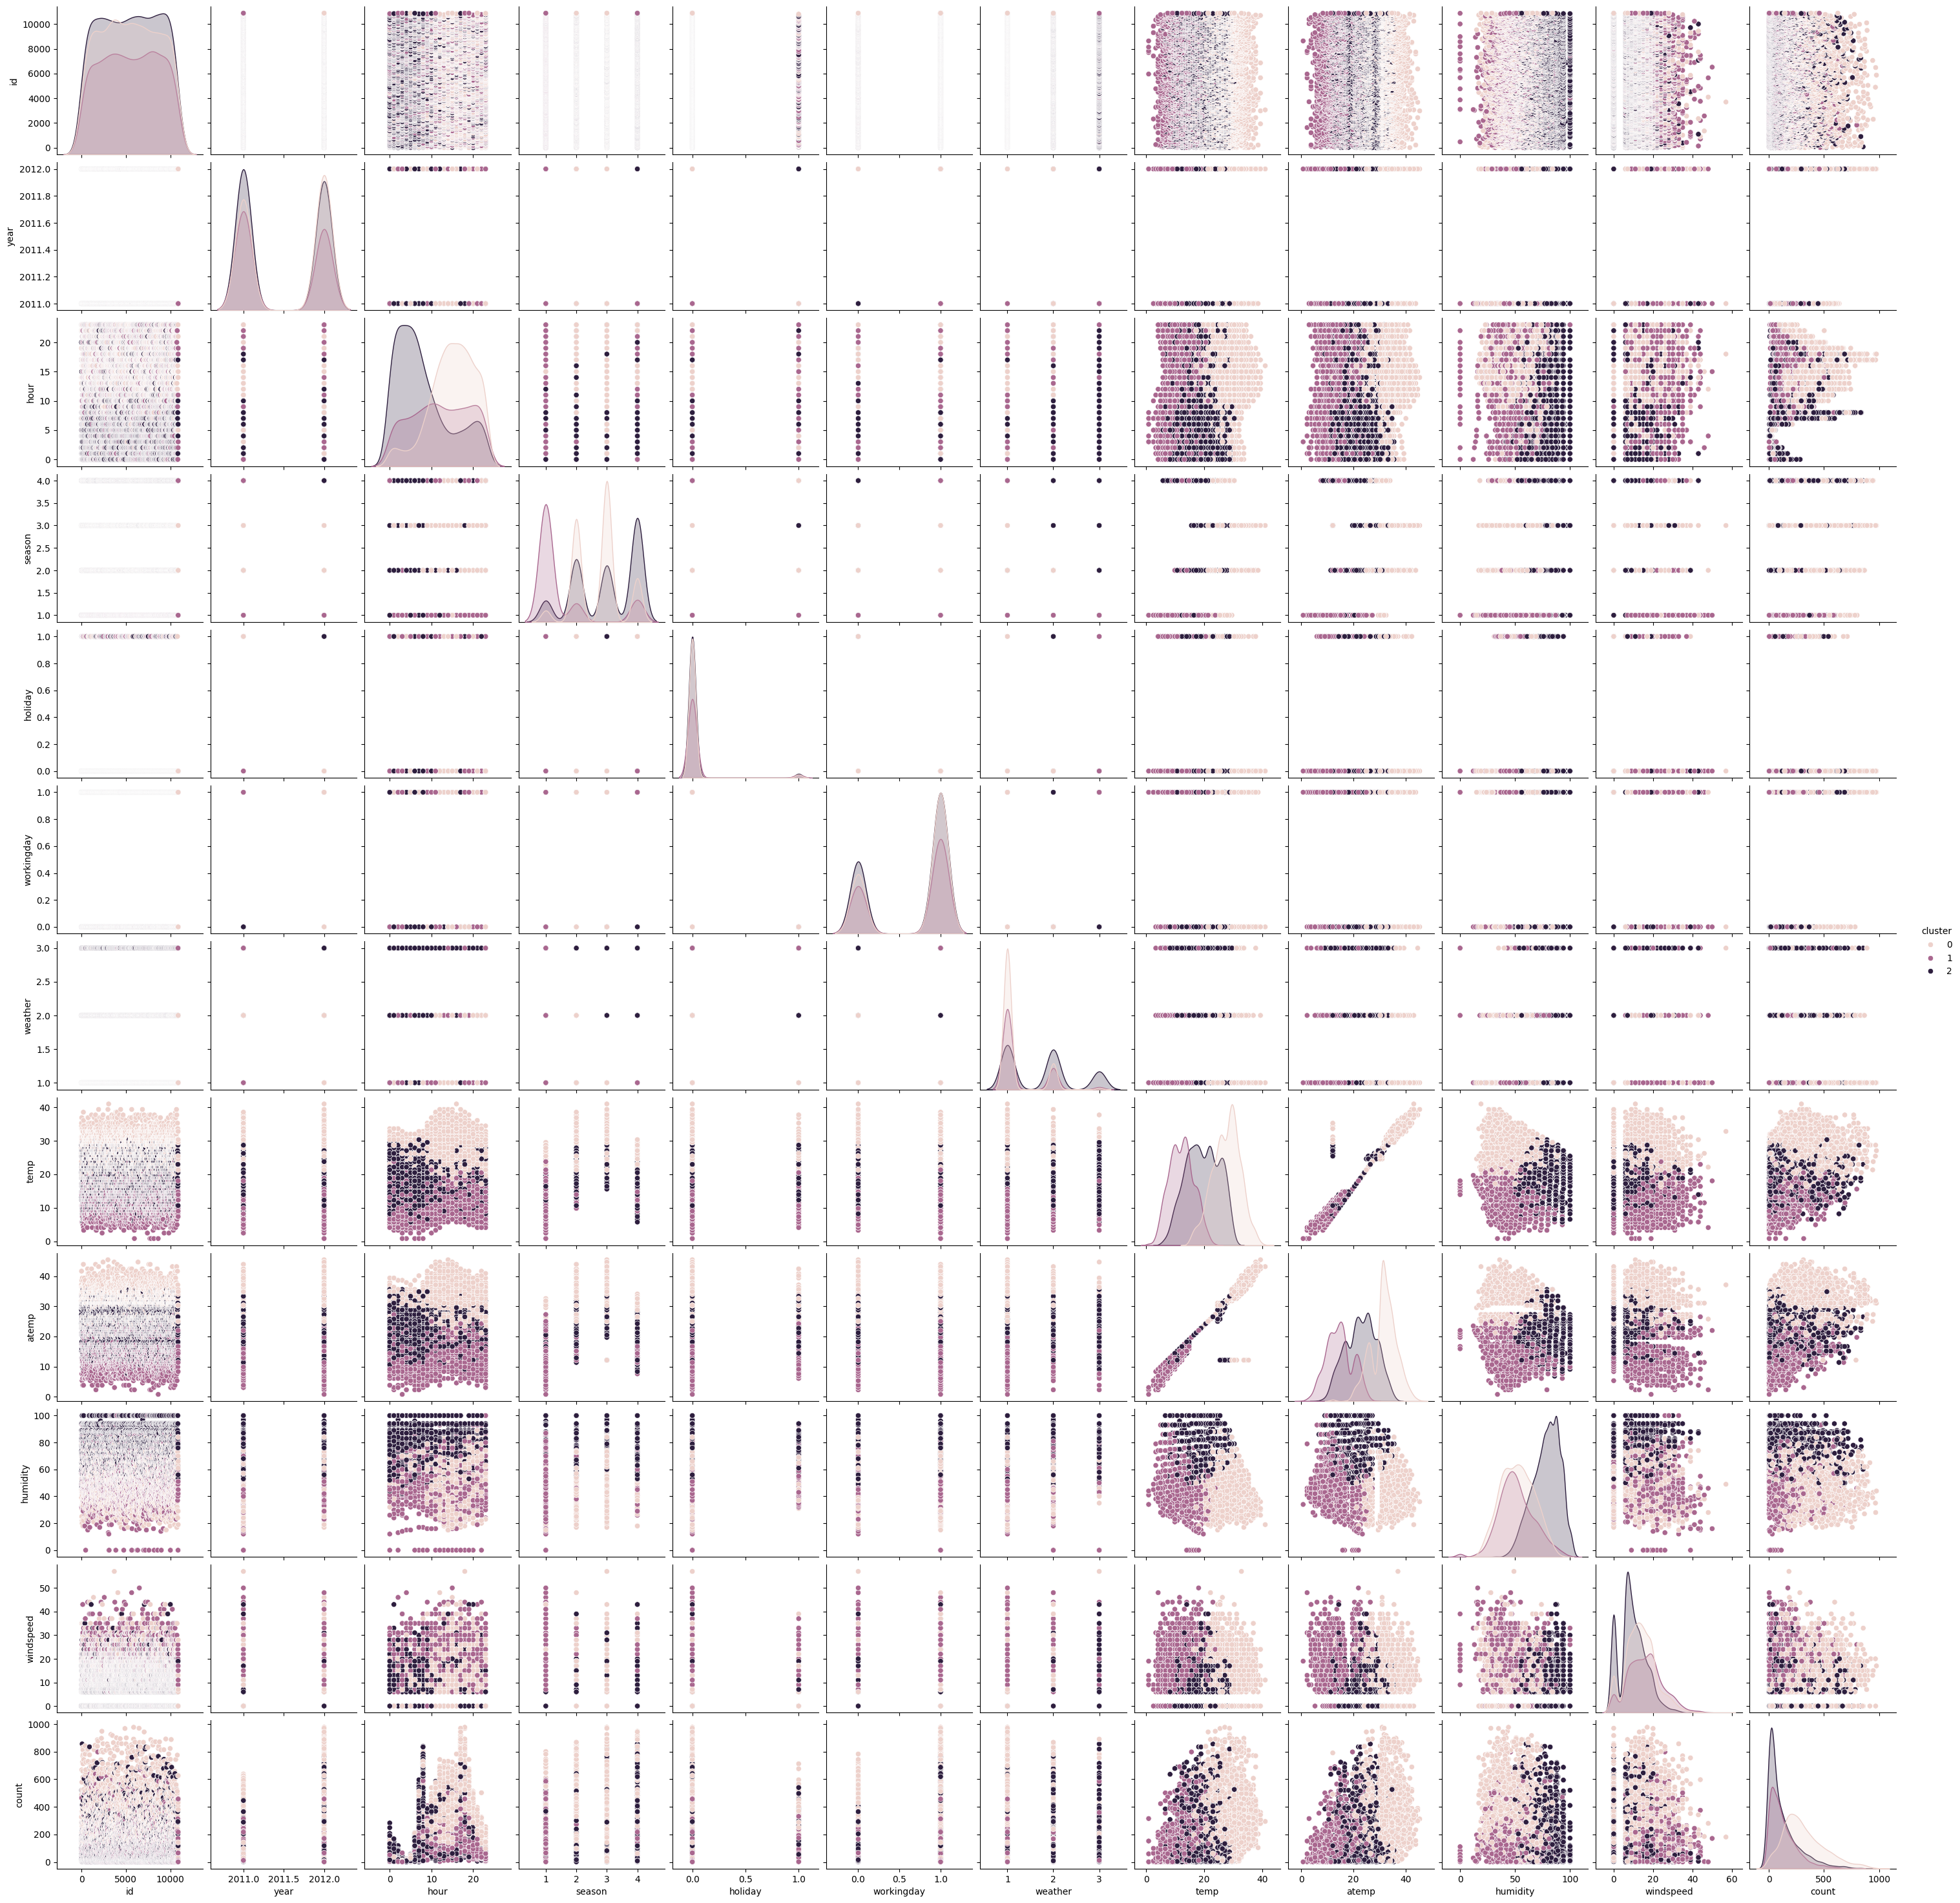

In [11]:
#visualize
sns.pairplot(df_train, hue='cluster')
plt.show()

### 5.0 Build Predicitve Model With The Clusters

In [12]:
#add clusters to the training dataset
combined_X_train = pd.concat([X_train, df_train['cluster']], axis = 1)
y_train = df_train['count']

In [13]:
#train our model
RF = RandomForestRegressor(random_state = 42)
RF.fit(combined_X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
#convert X_test_scaled to a df
if isinstance(X_test_scaled, np.ndarray):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

#make predicition
combined_X_test = pd.concat([X_test_scaled, df_test['cluster']], axis = 1)
prediction = RF.predict(combined_X_test)
prediction

array([ 22.9 ,  32.84, 119.02, ...,  42.  , 115.92, 121.14])

- Each number in the above array corresponds to the predicted bike demand (the number of bikes rented) for each data point in your test set. E.g the first prediction is approximately 22.9, which means the model predicts that about 23 bikes will be rented for that specific data point.